### LOADING THE DATA

In [1]:
from pathlib import Path
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from floor_plan_class import FloorPlan

import utils.segment_geometry as sg
import utils.parse_geojson as pg


# Define the woring directory and filename
data_dir = Path("data", "clean")
filename = "Output0_clean.geojson"
segments, transform_parameters = pg.load_segments(data_dir / filename)

### THE LIST OF POINTS

In [2]:
# number of segments
n_segments = len(segments.geoms)
print('number of segments', n_segments)

number of segments 5681


In [ ]:
n_intermidiate_points = 20
##################################################
n_rows_df = 2 * len(segments.geoms)
df = {'x': [], 'y': []}
# add to think if possible to delete duplicated point without affecting the resulted plot
for segment in segments.geoms:
    df['x'].append(segment.xy[0][0])
    df['x'].append(segment.xy[0][1])

    df['y'].append(segment.xy[1][0])
    df['y'].append(segment.xy[1][1])

    # intermidiate points
    # x = np.linspace(segment.xy[0][0], segment.xy[0][0], n_intermidiate_points)
    # y = np.linspace(segment.xy[1][0], segment.xy[1][1], n_intermidiate_points)
    # df['x'].extend(x)
    # df['y'].extend(y)
    

df = pd.DataFrame.from_dict(df)

### PLOT

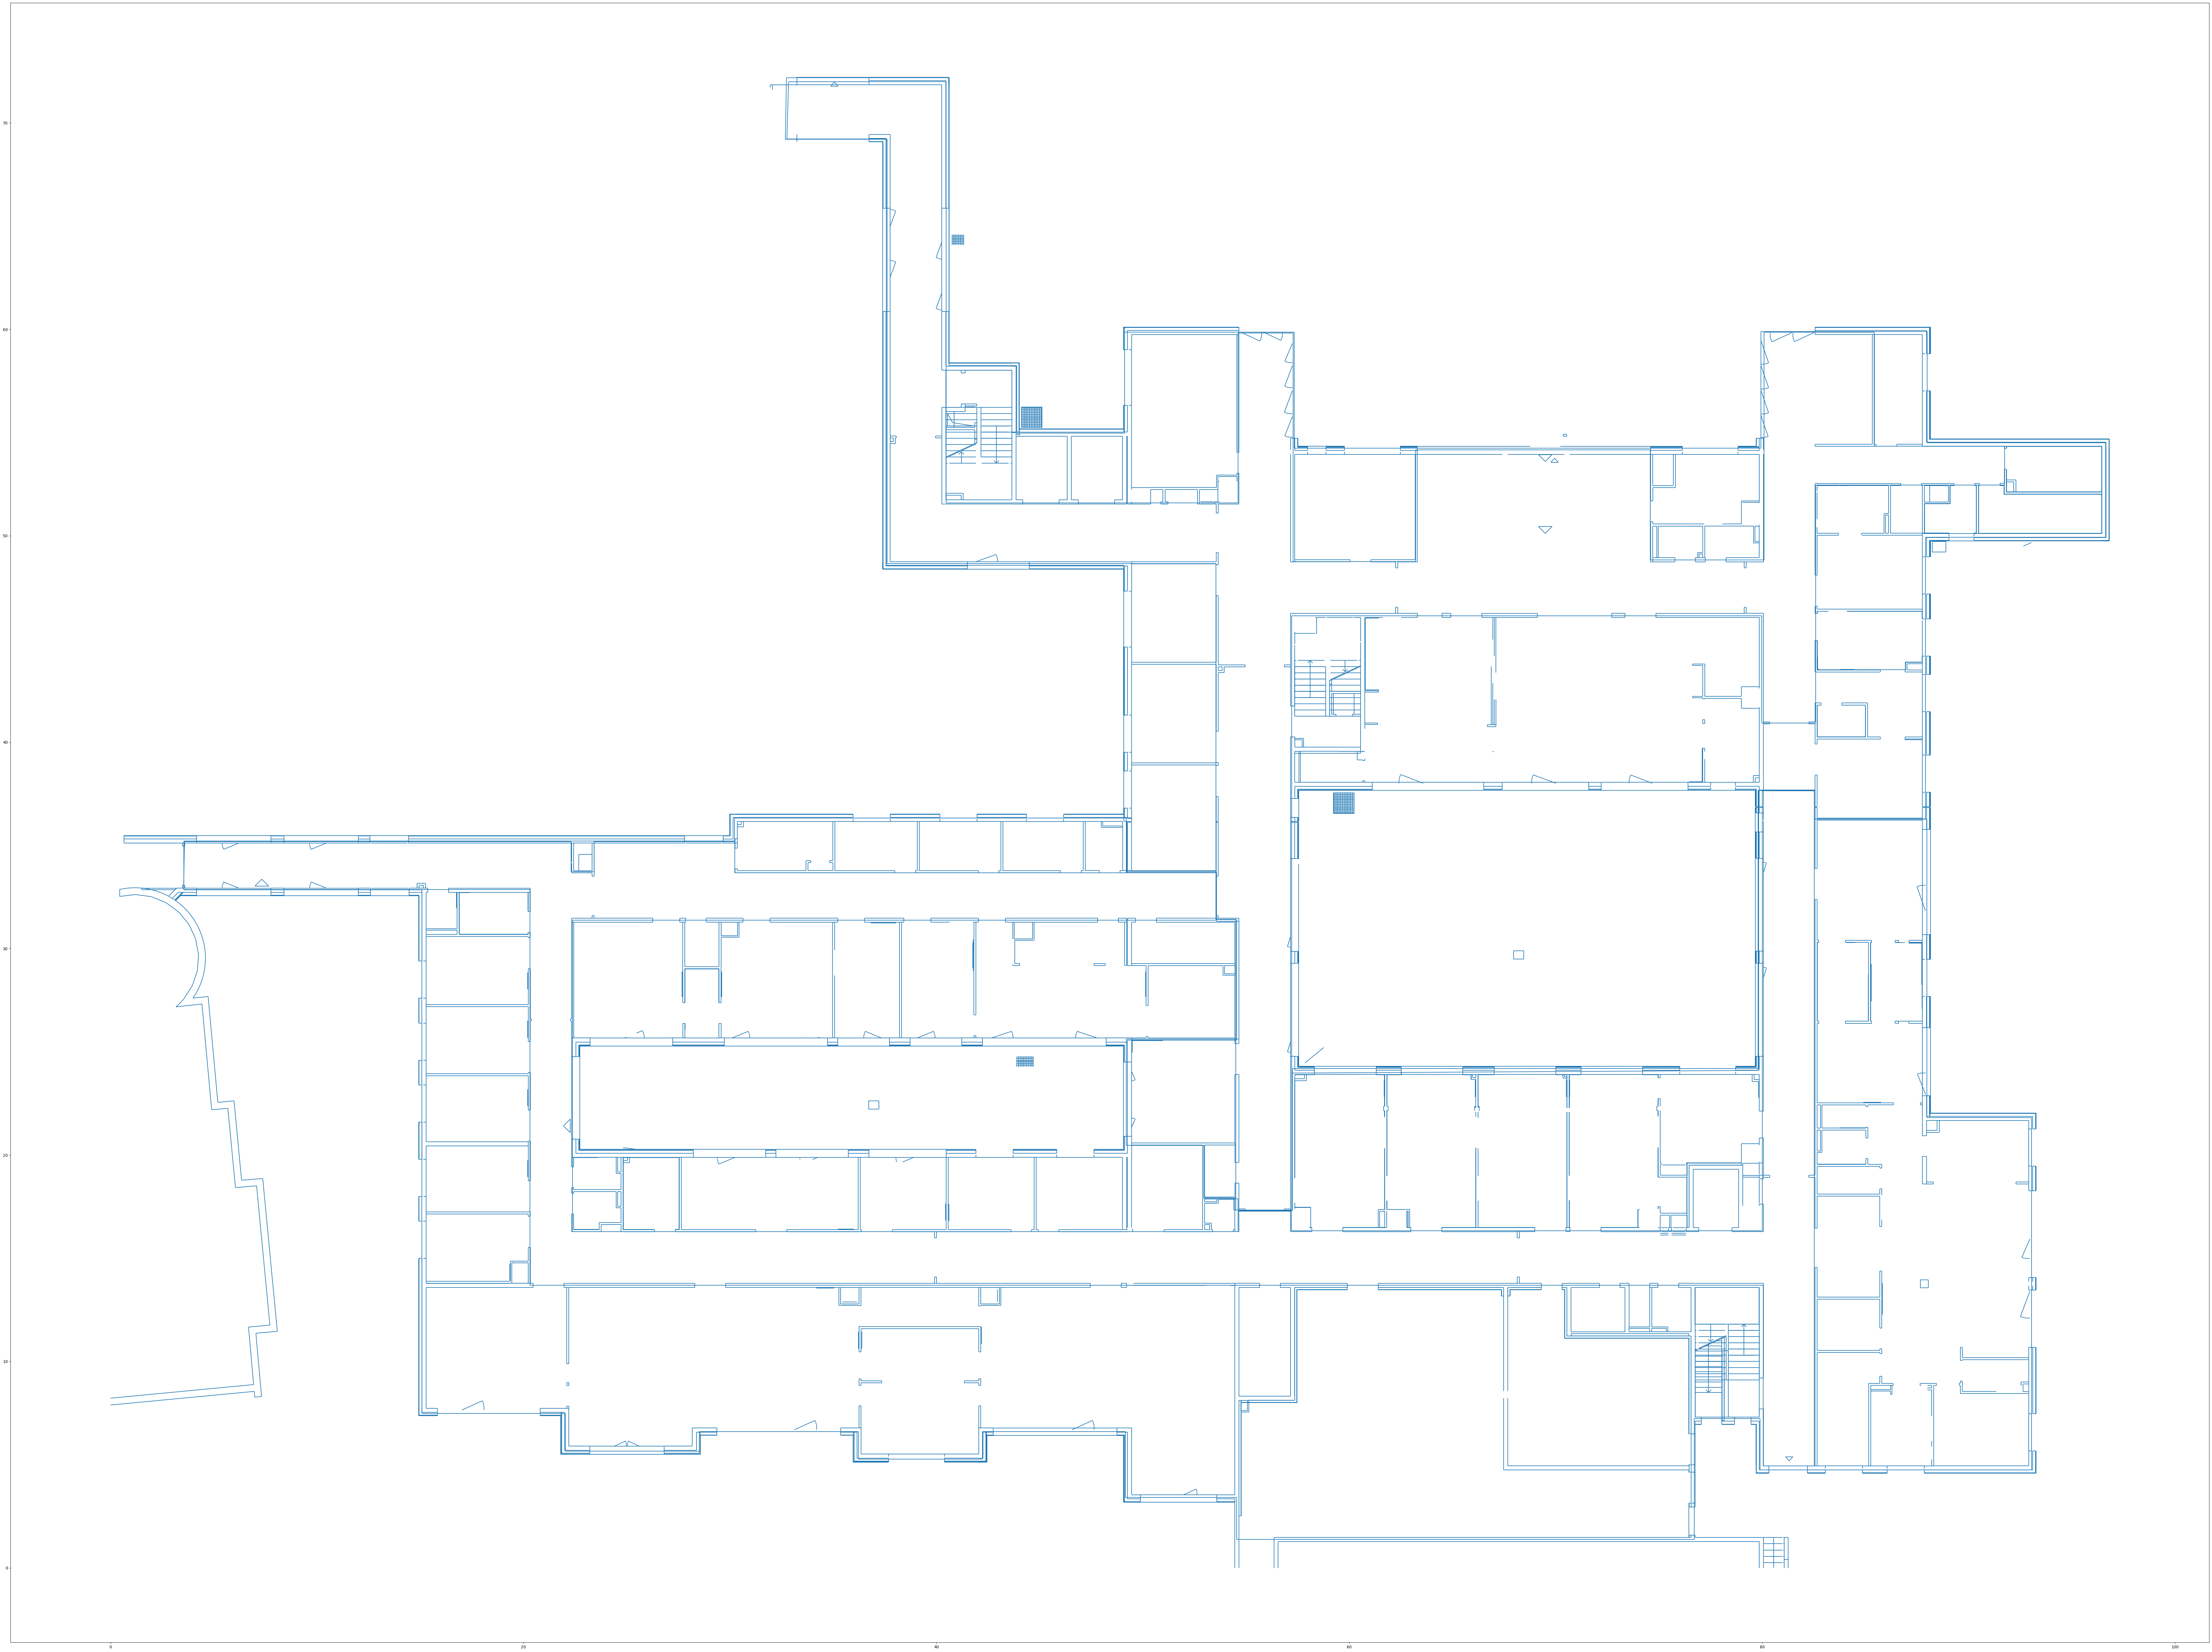

In [4]:
# H1: rise the definition
pg.plot_GeometryCollection(segments, figsize=(100, 100))

In [5]:
def color_map(cluster, n_clusters):
    """return a color for each cluster"""
    return plt.cm.viridis(cluster / n_clusters)

### CLUSTERING

In [6]:
# KMeans clustering
kmeans = KMeans(n_clusters=50)
kmeans.fit(df)

##################################################
# set cluster for each point
colors = []
for i in range(0, len(kmeans.labels_)):
    colors.append(color_map(kmeans.labels_[i], 50))

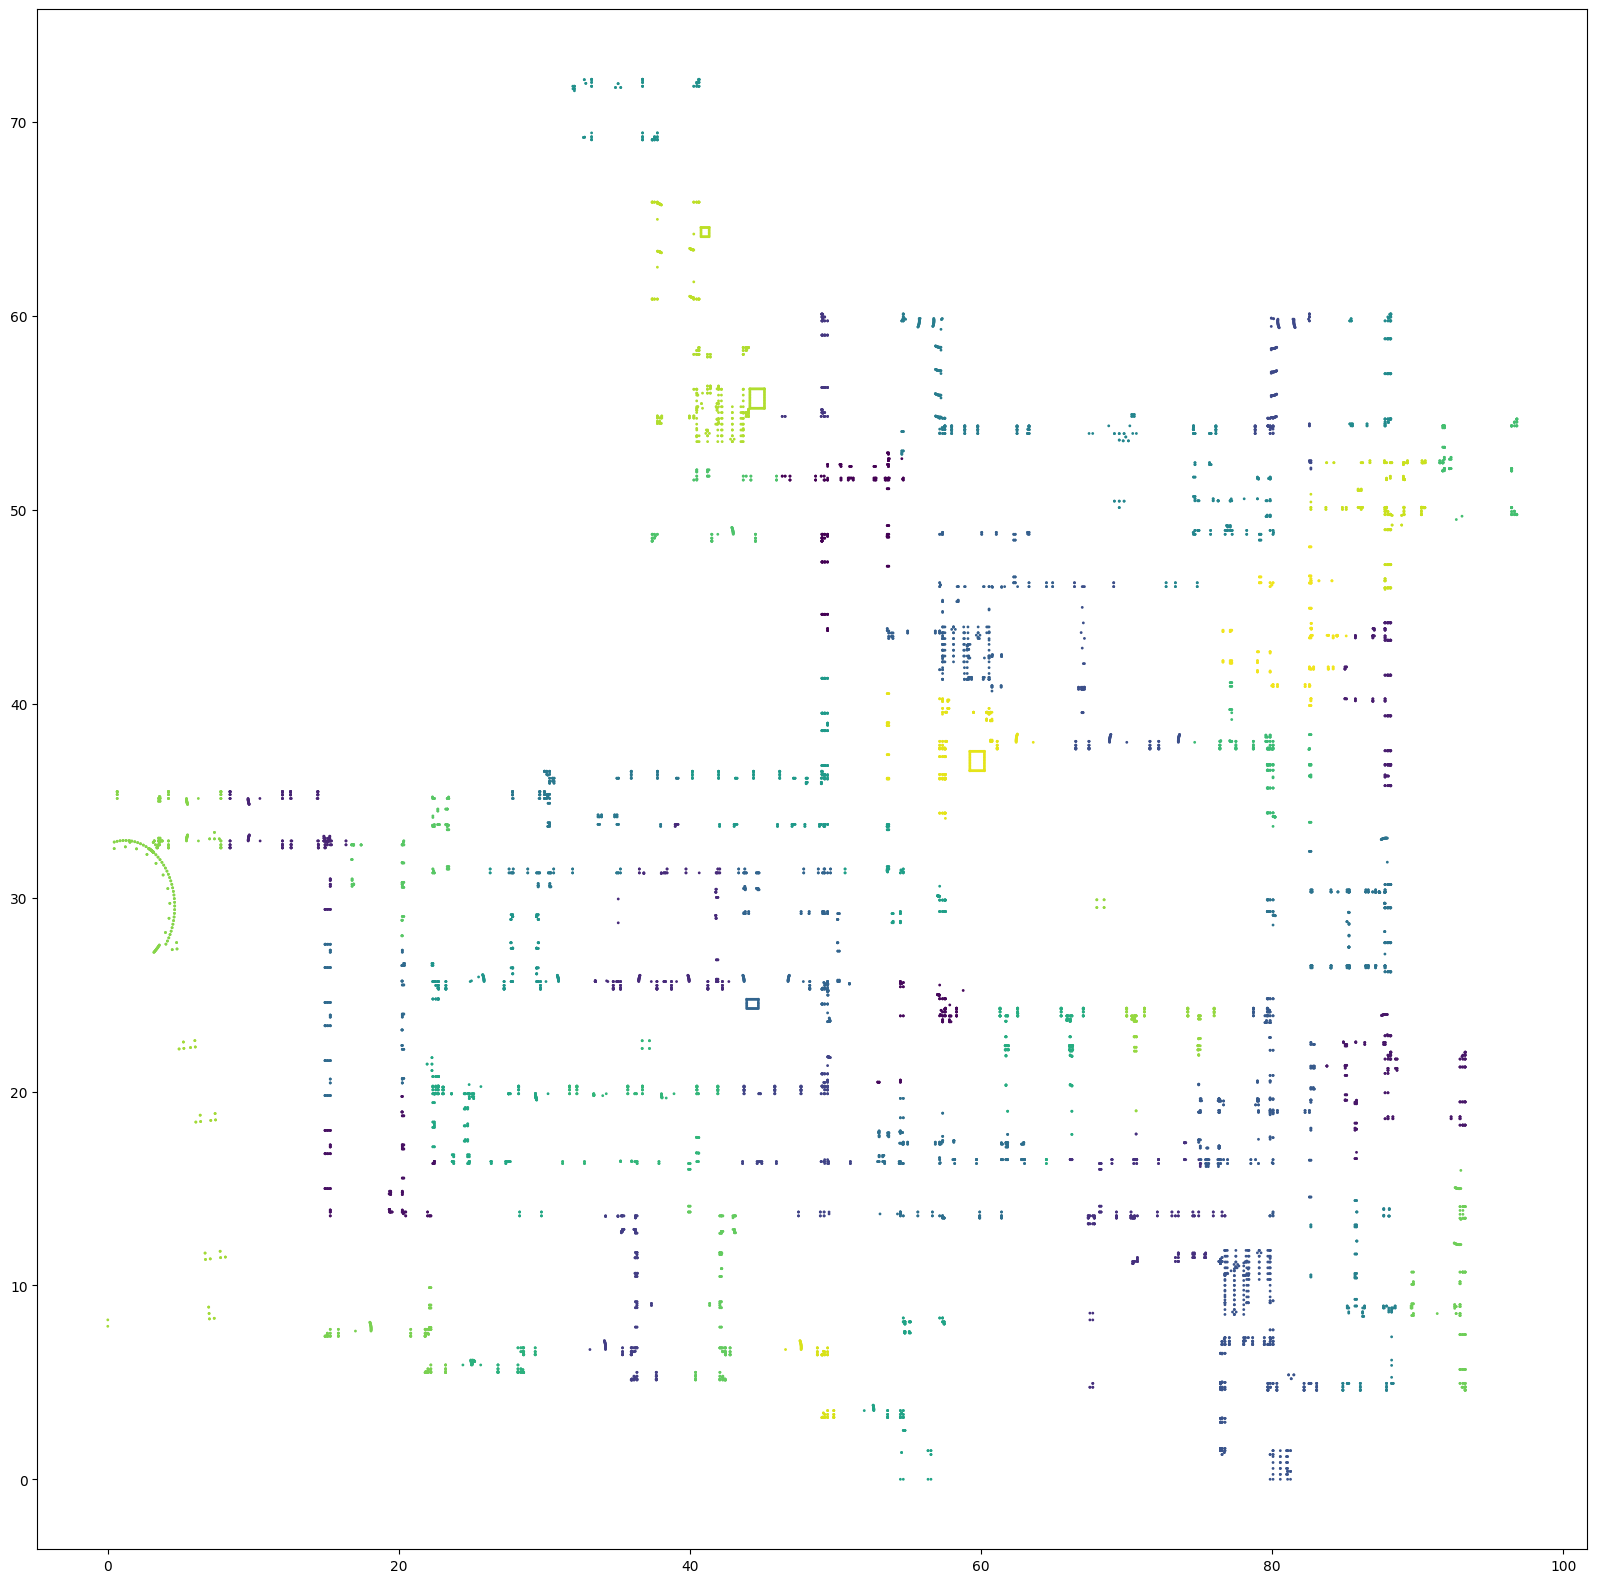

In [7]:
# plot points
plt.figure(figsize=(20, 20))
plt.scatter(df['x'], df['y'], c=colors, s=1)